In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('news.csv', index_col=None)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df=pd.read_csv('news.csv', index_col=None)
dataset=df.drop("Unnamed: 0",axis=1)
y=dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
print(count_train)
count_test = count_vectorizer.transform(X_test)
len(count_vectorizer.get_feature_names_out())
print(count_train.toarray())

  (1, 42470)	1
  (1, 12105)	1
  (1, 54177)	1
  (1, 50628)	1
  (1, 15924)	2
  (1, 44520)	2
  (1, 51896)	2
  (1, 35783)	4
  (1, 35256)	1
  (1, 21881)	1
  (1, 42534)	1
  (1, 8399)	1
  (1, 29531)	2
  (1, 15927)	2
  (1, 25686)	1
  (1, 49203)	2
  (1, 16814)	1
  (1, 36087)	1
  (1, 21568)	1
  (1, 25684)	1
  (1, 38823)	1
  (1, 47506)	1
  (1, 36831)	1
  (2, 16972)	1
  (2, 762)	1
  :	:
  (4243, 41435)	1
  (4243, 53607)	1
  (4243, 659)	1
  (4243, 38834)	1
  (4243, 19003)	1
  (4243, 11415)	1
  (4243, 7545)	1
  (4243, 22426)	1
  (4243, 54007)	1
  (4243, 7113)	1
  (4243, 4932)	1
  (4243, 39497)	1
  (4243, 50053)	1
  (4243, 38849)	1
  (4243, 20702)	1
  (4243, 42139)	1
  (4243, 17247)	1
  (4243, 50052)	1
  (4243, 55228)	1
  (4243, 29255)	1
  (4243, 49435)	1
  (4243, 11257)	1
  (4243, 52945)	1
  (4243, 20905)	1
  (4243, 7962)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_classifier(classifier, X_test, y_test):
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, cm

def logistic_regression(X_train, y_train, X_test):
    from sklearn.linear_model import LogisticRegression
    # Fitting Logistic Regression to the Training set
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def linear_svm(X_train, y_train, X_test):
    from sklearn.svm import SVC
    # Fitting Linear SVM to the Training set
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def kernel_svm(X_train, y_train, X_test):
    from sklearn.svm import SVC
    # Fitting Kernel SVM to the Training set
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def naive_bayes(X_train, y_train, X_test):
    from sklearn.naive_bayes import GaussianNB
    # Fitting Naive Bayes to the Training set
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def k_nearest_neighbors(X_train, y_train, X_test):
    from sklearn.neighbors import KNeighborsClassifier
    # Fitting K-Nearest Neighbors to the Training set
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def decision_tree(X_train, y_train, X_test):
    from sklearn.tree import DecisionTreeClassifier
    # Fitting Decision Tree to the Training set
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def random_forest(X_train, y_train, X_test):
    from sklearn.ensemble import RandomForestClassifier
    # Fitting Random Forest to the Training set
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

# Sample usage
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=53)

# Apply CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Call each algorithm function with the training and test data
models = {
    'Logistic Regression': logistic_regression(count_train, y_train, count_test),
    'Linear SVM': linear_svm(count_train, y_train, count_test),
    'Kernel SVM': kernel_svm(count_train, y_train, count_test),
    'Naive Bayes': naive_bayes(count_train.toarray(), y_train, count_test.toarray()), # Naive Bayes expects dense matrix
    'K-Nearest Neighbors': k_nearest_neighbors(count_train, y_train, count_test),
    'Decision Tree': decision_tree(count_train, y_train, count_test),
    'Random Forest': random_forest(count_train, y_train, count_test)
}

# Print results
for clf_name, (classifier, accuracy, report, cm) in models.items():
    print(clf_name)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("-------------------END----------------")
    

Logistic Regression
Accuracy: 0.9110473457675753
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.88      0.94      0.91      1008
        REAL       0.94      0.88      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091

Confusion Matrix:
[[950  58]
 [128 955]]
---------------------------------------
Linear SVM
Accuracy: 0.8703969392635102
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.86      0.88      0.87      1008
        REAL       0.89      0.86      0.87      1083

    accuracy                           0.87      2091
   macro avg       0.87      0.87      0.87      2091
weighted avg       0.87      0.87      0.87      2091

Confusion Matrix:
[[887 121]
 [150 933]]
---------------------------------------
Kernel SVM
Accuracy: 0.8617886178861789
Classific

In [5]:
import pandas as pd

# Initialize empty lists to store classifier names and accuracies
classifier_names = []
accuracies = []

# Iterate over each classifier and store the accuracy
for clf_name, (classifier, accuracy, _, _) in models.items():
    classifier_names.append(clf_name)
    accuracies.append(accuracy)

# Create a DataFrame to store the accuracy scores
accuracy_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracies
})

# Display the DataFrame
print(accuracy_df)

            Classifier  Accuracy
0  Logistic Regression  0.911047
1           Linear SVM  0.870397
2           Kernel SVM  0.861789
3          Naive Bayes  0.808704
4  K-Nearest Neighbors  0.793879
5        Decision Tree  0.819703
6        Random Forest  0.841703


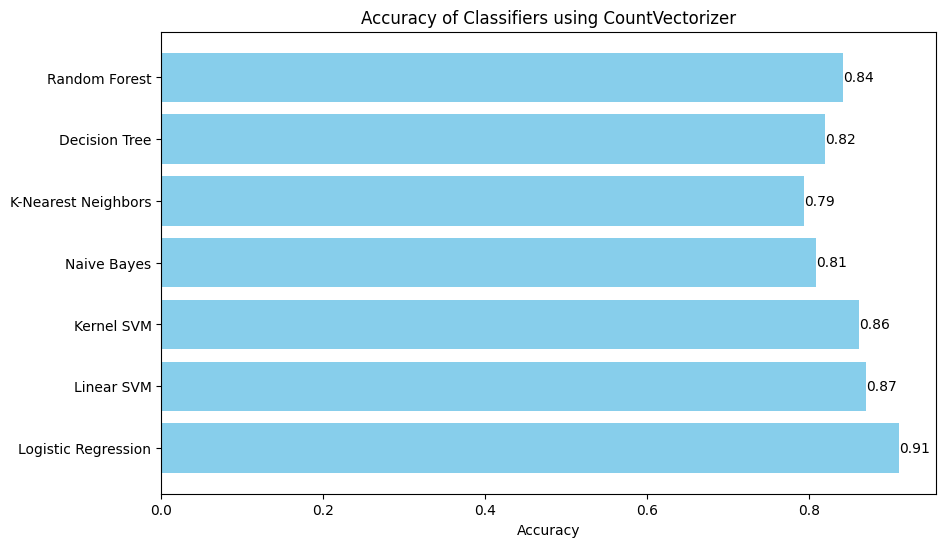

In [6]:
import matplotlib.pyplot as plt

# Initialize lists to store classifier names and accuracy scores
classifiers = []
accuracies = []

# Iterate over each classifier and store the accuracy scores
for clf_name, (_, accuracy, _, _) in models.items():
    classifiers.append(clf_name)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Classifiers using CountVectorizer')

# Add accuracy scores to the end of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc:.2f}', 
             va='center', ha='left')